<a href="https://colab.research.google.com/github/HuynhTanNam-19146217/ProjectCuoiKyAI/blob/Link-COLAB%26DRIVE/ProjectCuoiKy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set=train.flow_from_directory('/content/drive/MyDrive/cuoikyAI/Train',target_size = (64,64),batch_size = 12,class_mode = 'categorical')
test_set=validation.flow_from_directory('/content/drive/MyDrive/cuoikyAI/Validation',target_size = (64,64),batch_size = 12,class_mode = 'categorical')

Found 501 images belonging to 5 classes.
Found 248 images belonging to 5 classes.


In [ ]:
train_set.class_indices

{'BuoiChum': 0,
 'BuoiDaXanh': 1,
 'BuoiDien': 2,
 'BuoiDoLuanVan': 3,
 'BuoiNamRoi': 4}

In [ ]:
model = tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape =(64,64,3)),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),
     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(5,activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                    

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_set,batch_size=64,epochs=20,verbose=1,validation_data=test_set)

Epoch 1/20
42/42 [==============================] - 14s 331ms/step - loss: 0.2260 - accuracy: 0.9261 - val_loss: 0.1928 - val_accuracy: 0.9435
Epoch 2/20
42/42 [==============================] - 14s 331ms/step - loss: 0.0700 - accuracy: 0.9840 - val_loss: 0.1995 - val_accuracy: 0.9355
Epoch 3/20
42/42 [==============================] - 14s 332ms/step - loss: 0.2225 - accuracy: 0.9202 - val_loss: 0.1358 - val_accuracy: 0.9597
Epoch 4/20
42/42 [==============================] - 14s 330ms/step - loss: 0.1213 - accuracy: 0.9641 - val_loss: 0.2737 - val_accuracy: 0.9153
Epoch 5/20
42/42 [==============================] - 14s 333ms/step - loss: 0.0493 - accuracy: 0.9840 - val_loss: 0.1277 - val_accuracy: 0.9556
Epoch 6/20
42/42 [==============================] - 14s 331ms/step - loss: 0.0643 - accuracy: 0.9760 - val_loss: 0.2095 - val_accuracy: 0.9637
Epoch 7/20
42/42 [==============================] - 14s 334ms/step - loss: 0.0646 - accuracy: 0.9741 - val_loss: 0.2074 - val_accuracy: 0.9395

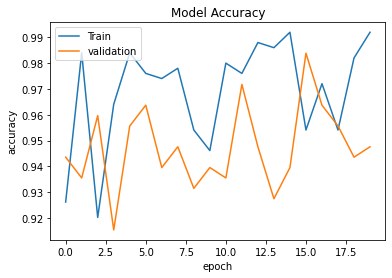

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
score=model.evaluate(test_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

21/21 [==============================] - 2s 99ms/step - loss: 0.1902 - accuracy: 0.9476
Sai số:  0.1902187615633011
Độ chính xác:  0.9475806355476379


In [ ]:
model.save('PhanLoaiBuoi.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('PhanLoaiBuoi.h5')

Dự đoán: Bưởi Da Xanh


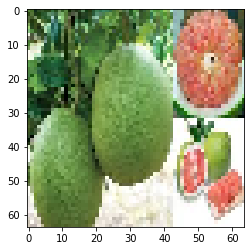

In [ ]:
test_img=load_img('/content/drive/MyDrive/cuoikyAI/Test/BuoiDaXanh/BuoiDaXanh (15).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
  prediction="Bưởi Chùm"
elif round(result[0][1])==1:
  prediction="Bưởi Da Xanh"
elif round(result[0][2])==1:
  prediction="Bưởi Diễn"
elif round(result[0][3])==1:
  prediction="Bưởi Đỏ Luận Văn"  
elif round(result[0][4])==1:
  prediction="Bưởi Năm Roi" 
print('Dự đoán:', prediction)